In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1234)

%matplotlib inline

# Métricas y validación de resultados

## Carga de datos

In [2]:
wine_data = load_wine()

X = wine_data['data']
y = wine_data['target']

print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Conjunto de datos de entrenamiento y evaluación

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Búsqueda de parámetros

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.338 (+/-0.003) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.401 (+/-0.006) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.479 (+/-0.010) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.507 (+/-0.006) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.423 (+/-0.001) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.493 (+/-0.021) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.549 (+/-0.005) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.507 (+/-0.023) para los parámetros {'alpha': 0.001, 'eta0': 0

/home/francolq/.virtualenvs/pln/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/francolq/.virtualenvs/pln/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/francolq/.virtualenvs/pln/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/francolq/.virtualenvs/pln/lib/python3.6/site-packages/sklearn/metrics/classification.py:1

# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.338 (+/-0.001) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.380 (+/-0.004) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.570 (+/-0.016) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.514 (+/-0.019) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.514 (+/-0.016) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.620 (+/-0.001) para los parámetros {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.563 (+/-0.004) para los parámetros {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.585 (+/-0.009) para los parámetros {'alpha': 0.001, 'eta0': 0.01

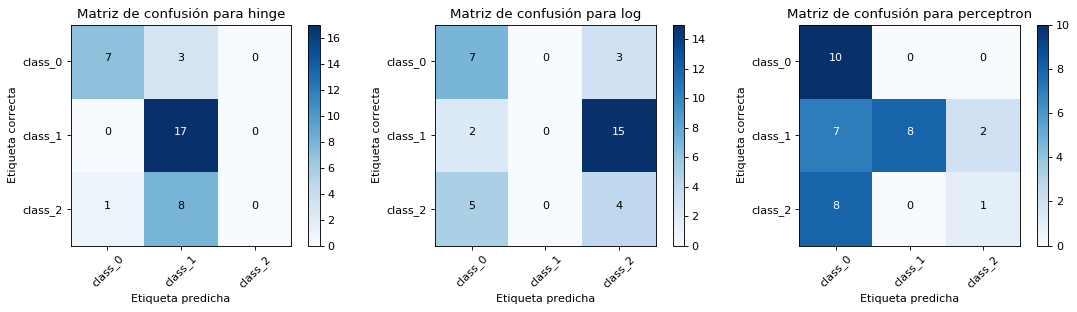

In [4]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=wine_data.target_names, title="Matriz de confusión para %s" % loss)